In [78]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [53]:
def Shannon(p):
    # P correspond à une distribution de probabilité
    if p == 0 or p == 1:
        return float(0)
    return -p*math.log(p, 2) - (1-p)*math.log(1-p, 2)

def Gini(p):
    if p == 0:
        return float(0)
    return 1 - p**2 - (1-p)**2

def Cul_sec(p):
    if p == 0 or p == 1:
        return float(0)
    if p > 1-p:
        return ((1-p)/p)*math.log(2, 2)
    return (p/(1-p))*math.log(2, 2)


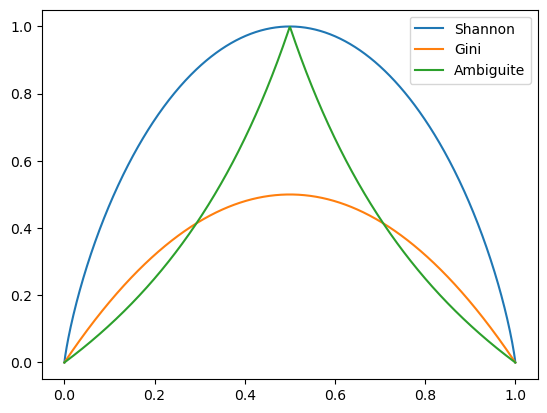

In [54]:
x=np.linspace(0,1,1000)
y=np.asarray([Shannon(i) for i in x])
plt.plot(x, y, label='Shannon')
y=np.asarray([Gini(i) for i in x])
plt.plot(x, y, label='Gini')
y=np.asarray([Cul_sec(i) for i in x])
plt.plot(x, y, label='Ambiguite')
plt.legend()
plt.show()

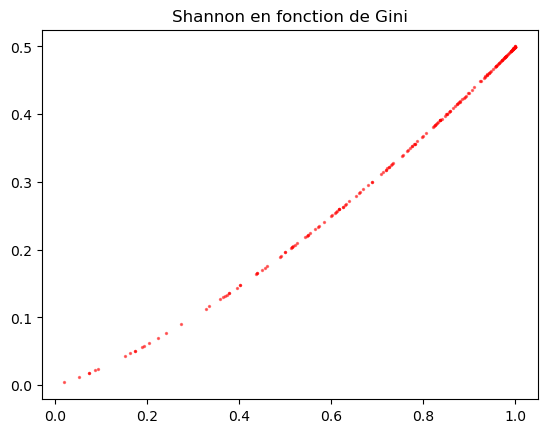

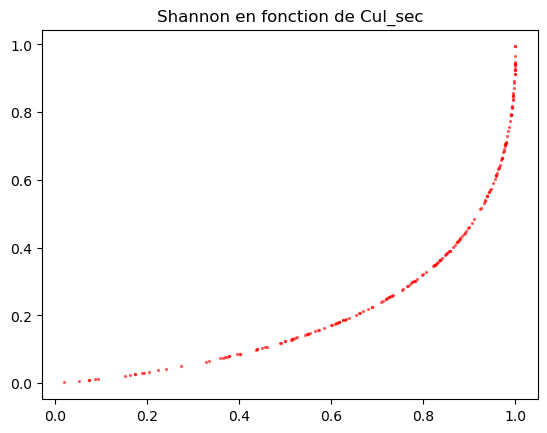

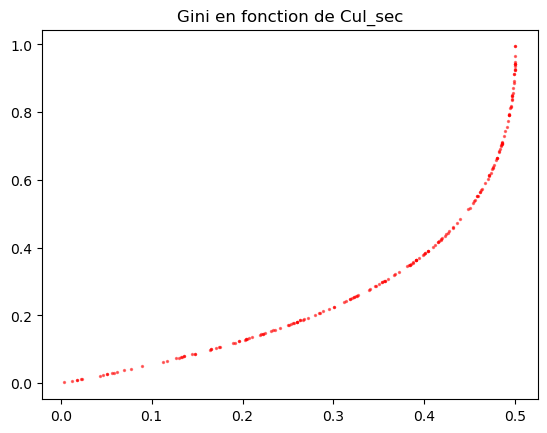

In [59]:
sample = np.random.choice(x, size = 200)
list_H = [Shannon, Gini, Cul_sec]
for i in range(len(list_H)-1):
    for j in range(i+1, len(list_H)):
        f_1 = list_H[i]
        f_2 = list_H[j]
        H1 = []
        H2 = []
        for p in sample:
            H1.append(f_1(p))
            H2.append(f_2(p))
        plt.scatter(H1, H2, s=2, c='red', alpha=0.5)
        plt.title(f"{f_1.__name__} en fonction de {f_2.__name__}")
        plt.show()

En fonction des mesures prises en considération, nous pouvons observer, dans le cas de la classification binaire, que les points suivent une courbe que peut être assimilée à une courbe quadratique ou bien une courbe linéaire. Si la courbe est strictement croissante, nous pouvons conclure que si nous prenons deux mesures $H_1$ et $H_2$, et une probabilité $p_1$ et $p_2$, nous avons:

$$
\text{Si } H_1(p_1) > H_1(p_2) \Rightarrow H_2(p_1) > H_2(p_2)
$$

Ceci veut dire que l'ordre des attributs est conservé et que nous pouvons donc utiliser n'importe quelle mesure, puisqu'on connaît la relation entre $H_1$ et $H_2$

## Q.2

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.datasets import load_digits
base_digits = load_digits()
print("Descriptions de la base digits:\n", base_digits.data)

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(base_digits.data, base_digits.target, test_size=0.2)

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
mon_arbre = DecisionTreeClassifier(criterion="entropy")
mon_arbre.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [77]:
mon_arbre.score(X_test, y_test)

0.8555555555555555

## Q3.

In [79]:
df = pd.read_csv('data/election.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/election.csv'